# Estimate-Petrophysical-Rock-Types-PRT-from-normalized-core-data-using-KNN

### Introduction

#### Predict Petrophysical Rock Types (PRT)

###### The objective of this project is to estimate Petrophysical Rock Types (PRTs) as defined by Clerke(1) for the Arab-D carbonate reservoir using just Porosity and Permeability. This project utilizes normalized Porosity and Permeability values. We calculate the Euclidean distance between the reference data and the normalized user defined poro-perm and determines the most likely PRT for the user defined values. 

###### The Arab D data set from Clerke is quite distinctive. Clerke acquired nearly 450 High Pressure Mercury Injection Capillary Pressure (HPMI) measurements in the Arab D reservoir; however, Clerke's final samples were randomly selected from 1,000's of pre-qualified core samples ensuring a broad distribution and representation of all Petrophysical properties.  Clerke fit a Thomeer hyperbolas to each pore system in each sample to generate the published Thomeer Capillary Pressure parameters including Bulk Volume Occupied (BVi), curvature of Capillary Pressure curve related to the variability of pore throats (Gi) and the Initial Displacement Pressures (Pdi) for each pore system i. From these data Clerke established the PRTs based on the Initial Displacement Pressures for each pore system and the number of pore systems present in each sample. From the figure below it is rather evident that Clerke's PRTs are Petrophysically well-defined where each color represents a different PRT.  The Capillary Pressure curves and Pore Throat Distributions (PTD) shown on the right hand side of the figure illustrate the unique characteristics of each PRT. 


![TS_Image](PRT.png)


###### The characterization of each PRTs is shown below:


![TS_Image](Rock-Types.png)


###### As can be seen in the first figure above, the PRTs are rather well segregated on the Porosity vs. Permeability Cross Plot as they fall in distinct regions or clusters on the Cross Plot. 

###### For modeling purposes it is important to take advantage of the excellent correlations between the Thomeer Capillary Pressure parameters. the correlation of core Permeability vs. the Mode of the Pore Throats Distribution has a high correlation coefficient of 0.88. Pd1 correlates to the Mode of the PTD with a correlation coefficient of 0.99. The Mode of the PTD can be calculated directly from the Thomeer Parameters using the following equation:

	Mode of PTD (microns) = exp(-1.15*G1) * (214/Pd1)

###### The calculated Mode of PTD above is located at the exact peak of the Capillary Pressure derivative-derived Pore Throat Distribution for the most dominate pore size, and this represents the most abundant pore throat for the sample. We have found that the Mode of the PTD to be very useful in the 2D and 3D modeling of Petrophysical Properties for both Carbonate and Clastic reservoirs. Winland's r35 tries to approximate the mode; however, Amaefule's FZI is the mean pore throat radius and falls between the two modes of a bi-modal carbonate sample. 

###### The code for this program requires the user to input Porosity and Permeability, and then the program calculates the most probable Rock Type (Rock_Index) and provides a Capillary Pressure curve for that Rock Type considering the user provided porosity and permeability.


![TS_Image](knn_results.png)







1 Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008. 



### Code:

###### Load dependencies

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 27 09:50:53 2019

@author: craig
"""


import matplotlib.pyplot as plt
import numpy as np
import math
import xlrd
from colorama import Fore, Style


###### Load Thomeer Reference Data

In [2]:
# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #                Read Reference Data Spreadsheet 
# # #  Read mapinv_reference_data_carbonates_calculatedMode_Rosetta data 
# # #                which is the Rosetta Stone reference data per Clerke
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


book = xlrd.open_workbook("mapinv_reference_data_carbonates_calculatedMode_Rosetta.xls")  

print( "The number of worksheets is", book.nsheets)
#print( "Worksheet name(s):", book.sheet_names())
sh = book.sheet_by_index(0)
print(sh.name, sh.nrows, sh.ncols)

import win32com.client
o = win32com.client.Dispatch("Excel.Application")


# ---------------------------------------------------------------------------- 
#                  Initialize DATA 
# ----------------------------------------------------------------------------

Permeability = []
Porosity = []
G1 = []
PD1 = []
BV1 = []
G2 = []
PD2 = []
BV2 = []
Rock_Index = []

# ------------------------------------------------------------------ 
#    read in maininv_reference2 data which is just Rosetta Stone 
#                     this is reference data
#                       DATA WILL BE LOADED
# ------------------------------------------------------------------


for i in range(0,sh.nrows,1):
        Permeability.append(sh.cell_value(rowx=i, colx=1))
        Porosity.append(sh.cell_value(rowx=i, colx=2))   #fraction
        G1.append(sh.cell_value(rowx=i, colx=3))
        PD1.append(sh.cell_value(rowx=i, colx=4))
        BV1.append(sh.cell_value(rowx=i, colx=7))
        G2.append(sh.cell_value(rowx=i, colx=5))
        PD2.append(sh.cell_value(rowx=i, colx=6))
        BV2.append(sh.cell_value(rowx=i, colx=8))
        Rock_Index.append(sh.cell_value(rowx=i, colx=11))
        

The number of worksheets is 1
main 444 13


###### Define Normalization Scheme

In [3]:
Perm_max = 4
Perm_min = -4
Por_max = .35
Por_min = 0


###### Plot Porosity and Permeability data with Color Z-axis for PRT

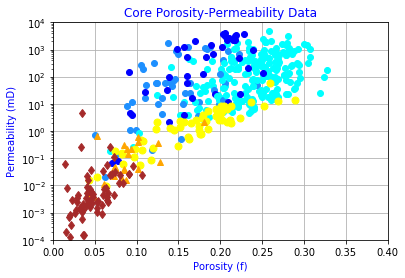



  Cyan -       Rock_Index = 1 which is Macro-Porous Rock with Meso-Porous Grains
  DodgerBlue - Rock_Index = 2 which is Macro-Porous Rock with Micro-Porous Grains
  Blue -       Rock_Index = 3 which is Macro-Porous Rock with Micro and Meso-Porous Grains
  Yellow -     Rock_Index = 4 which is Meso-Porous Rock
  Orange -     Rock_Index = 5 which is Meso-Porous Rock with Micro-Porous Grains
  Brown -      Rock_Index = 6 which is Micro-Porous Rock




In [4]:
# =============================================================================
# # ===========================================================================
# # #------------------------------------------------------------ 
# # #               
# # #     End of reading in mapinv reference data
# # #------------------------------------------------------------
# # ===========================================================================
# =============================================================================



xpor=np.array(Porosity)
yperm=np.array(Permeability)



for i in range(0,sh.nrows,1):
    if Rock_Index[i]   == 1:
        plt.semilogy(Porosity[i], Permeability[i], color='cyan', linestyle='none', marker='o', markerfacecolor='cyan', markersize=6)
    elif Rock_Index[i]  == 2: 
        plt.semilogy(Porosity[i], Permeability[i], color='dodgerblue', linestyle='none', marker='o', markerfacecolor='dodgerblue', markersize=6)  
    elif Rock_Index[i]  == 3:
        plt.semilogy(Porosity[i], Permeability[i], color='blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=6)
    elif Rock_Index[i]  == 4:
        plt.semilogy(Porosity[i], Permeability[i], color='yellow', linestyle='none', marker='o', markerfacecolor='yellow', markersize=7)
    elif Rock_Index[i]  == 5:
        plt.semilogy(Porosity[i], Permeability[i], color='orange', linestyle='none', marker='^', markerfacecolor='orange', markersize=6)
    else:
        plt.semilogy(Porosity[i], Permeability[i], color='brown', linestyle='none', marker='d', markerfacecolor='brown', markersize=6)



plt.xlim(0,0.4)
plt.ylim(0.0001, 10000)
plt.title("Core Porosity-Permeability Data", color = 'blue')
plt.ylabel('Permeability (mD)', color = 'blue')
plt.xlabel('Porosity (f)', color = 'blue')
plt.grid(True)
#plt.legend()
plt.show()


    
print()
print()
print(Fore.BLUE + '  Cyan -       Rock_Index = 1 which is Macro-Porous Rock with Meso-Porous Grains')
print(Fore.BLUE + '  DodgerBlue - Rock_Index = 2 which is Macro-Porous Rock with Micro-Porous Grains') 
print(Fore.BLUE + '  Blue -       Rock_Index = 3 which is Macro-Porous Rock with Micro and Meso-Porous Grains') 
print(Fore.BLUE + '  Yellow -     Rock_Index = 4 which is Meso-Porous Rock') 
print(Fore.BLUE + '  Orange -     Rock_Index = 5 which is Meso-Porous Rock with Micro-Porous Grains') 
print(Fore.BLUE + '  Brown -      Rock_Index = 6 which is Micro-Porous Rock') 
print()
print(Style.RESET_ALL) 
 

###### Input User Porosity and Permeability Data

In [5]:
Por = float(input('Input Porosity (fraction) = '))
Perm = float(input('Input Permeability (mD) = '))

Input Porosity (fraction) = .14
Input Permeability (mD) = 80


###### This is the beginning of KNN

In [6]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of KNN
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================



#normalized Porosity and Permeability inputs
por = (Por-Por_min)/(Por_max - Por_min)
perm= (math.log10(Perm) - Perm_min)/(Perm_max - Perm_min)



# =============================================================================
# #---------------------------------------------------------------------------- 
# #           
# #              ESTIMATE THOMEER PARAMETERS FOR BOTH PORE SYSTEMS
# #                   
# #----------------------------------------------------------------------------
# =============================================================================

dist_inv = []
dist_phi = []
dist_lperm = []
G1_weight = []
PD1_weight = []
BV1_weight = []
G2_weight = []
PD2_weight = []
BV2_weight = []
#Rock_Index_weight = []


dist_inv_total=0
G1_total  = 0
PD1_total = 0
BV1_total = 0
G2_total  = 0
PD2_total = 0
BV2_total = 0




inv_dist_array = []
#distance_knn_array = [rows,columns]
distance_knn_array = []


#------------------------------------------------------------------ 
#               Estimate all Thomeer Parameters for *_est values
#-------------------------------------------------------------------

Porosity_norm     = []
Permeability_norm = []


#this is the mapinv_reference_data being used 
for i in range(0,sh.nrows,1):

        Porosity_norm.append((Porosity[i] - Por_min) / (Por_max - Por_min))
        Permeability_norm.append((math.log10(Permeability[i]) - Perm_min) / (Perm_max - Perm_min))
        
        #Euclidian Distance
        dist_phi.append(   abs(por  - Porosity_norm[i]    ))  
        dist_lperm.append( abs(perm - Permeability_norm[i]))
        dist_inv.append( 1  /  math.sqrt(  dist_phi[i]**2 + dist_lperm[i]**2)  )

        
        #calculalte weights for each
        G1_weight.append(dist_inv[i]  * G1[i])
        PD1_weight.append(dist_inv[i] * PD1[i])
        BV1_weight.append(dist_inv[i] * BV1[i])
        G2_weight.append(dist_inv[i]  * G2[i])
        PD2_weight.append(dist_inv[i] * PD2[i])
        BV2_weight.append(dist_inv[i] * BV2[i])
        #Rock_Index_weight.append(dist_inv[i] * Rock_Index[i])
        


        inv_dist_array.append(dist_inv[i]);  # add items

# =============================================================================
###                    KNN Array
# # ===========================================================================
# # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, G1_weight, PD1_weight, BV1_weight, G2_weight, PD2_weight, BV2_weight,Rock_Index]
#        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
xnorm=np.array(Porosity_norm)
ynorm=np.array(Permeability_norm)


# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Transpose and Sort new kNN array
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#knn_array = np.transpose array
knn_array = np.transpose(distance_knn_array)
#print(knn_array)

#Sort array from large to low by column 0 which is dist_inv 
#xknn=np.array(knn_array)

#matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
#mat_sort = x[x[:,1].argsort()[::-1]]
#mat_sort = x[x[:,2].argsort()[::-1]]


###### Estimate Thomeer Parameters

In [7]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Calculate knn Thomeer Parameters
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


#------------------------------------------------------------------------------
#    Number of nearest Neighbors
#------------------------------------------------------------------------------
n_neighbors = 3
#------------------------------------------------------------------------------

dist_inv_total_knn = 0
G1_total_knn = 0
PD1_total_knn = 0
BV1_total_knn = 0
G2_total_knn = 0
PD2_total_knn = 0
BV2_total_knn = 0
#Rock_Index_total_knn = 0



#kNN Estimates for first 3 rows
#dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
for i in range(0,n_neighbors,1):
    dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
    G1_total_knn  = G1_total_knn + mat_sort[i][1]
    PD1_total_knn = PD1_total_knn + mat_sort[i][2]
    BV1_total_knn = BV1_total_knn + mat_sort[i][3]
    G2_total_knn  = G2_total_knn + mat_sort[i][4]
    PD2_total_knn = PD2_total_knn + mat_sort[i][5]
    BV2_total_knn = BV2_total_knn + mat_sort[i][6]
    #Rock_Index_total_knn = Rock_Index_total_knn + mat_sort[i][7]
    #print(mat_sort[i][7])
    
    
#back to k values and calculate estimations now
G1_est_knn  = G1_total_knn  / dist_inv_total_knn
PD1_est_knn = PD1_total_knn / dist_inv_total_knn
BV1_est_knn = (BV1_total_knn / dist_inv_total_knn)
G2_est_knn  = G2_total_knn  / dist_inv_total_knn
PD2_est_knn = PD2_total_knn / dist_inv_total_knn
BV2_est_knn = (BV2_total_knn / dist_inv_total_knn)
#Rock_Index_est_knn = int(Rock_Index_total_knn / n_neighbors)

print()
print()


###### Calculate Pc Curve from Thomeer Parameters

In [8]:
Pc = 0.5
bvarray = []
pcarray = []

for j in range(1, 105, 1):
    if Pc > PD1_est_knn:
        BVOCC1 = BV1_est_knn * 10**((-0.434 * G1_est_knn) / math.log10(Pc / PD1_est_knn))
    else:
        BVOCC1 = 0.001

    if Pc > PD2_est_knn:
        BVOCC2 = BV2_est_knn * 10**((-0.434 * G2_est_knn) / math.log10(Pc / PD2_est_knn))
    else:
        BVOCC2 = 0.001


    BVOCC = BVOCC1 + BVOCC2
    
    bvarray.append(BVOCC)
    pcarray.append(Pc)
    
    Pc = Pc * 1.12

   
x=np.array(bvarray)
y=np.array(pcarray)


###### Estimate most likely PRT

In [9]:


# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #              Rock Type from Most Common in KNN series
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================  
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]

#List = [mat_sort[0][7],mat_sort[1][7],mat_sort[2][7],mat_sort[3][7],mat_sort[4][7]]
List = []

for d in range(0,n_neighbors):
    List.append(mat_sort[d,7])


#print(most_frequent(List)) 
if most_frequent(List)   == 1:
    RxType = 'Macro-Porous Rock with Meso-Porous Grains'
elif most_frequent(List) == 2: 
   RxType = 'Macro-Porous Rock with Micro-Porous Grains'    
elif most_frequent(List) == 3:
    RxType = 'Macro-Porous Rock with Meso and Micro Grains'
elif most_frequent(List) == 4:
    RxType = 'Type 1 Meso-Porous Rock, uni-modal'
elif most_frequent(List) == 5:
    RxType = 'Type 1 Meso-Porous Rock with Micro-Porous Grains'
else:
    RxType = 'Non-Reservoir, Type 2 Micro-Porous Rock'


###### Plot Figures

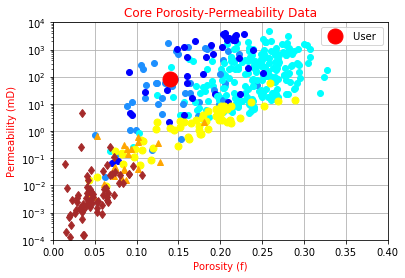


Most Frequent Rock_Index with  KNN = 3 using normlalized Poro-Perm data.
     Rock_Index = 2.0 , which is a Macro-Porous Rock with Micro-Porous Grains


Estimated Thomeer Parameters from KNN = 3  using normlalized Poro-Perm data.
     G1 = 0.35548813453934286 ,  Pd1 = 6.311278462513717 , BV1(%) = 11.515192271731747
     G2 = 0.3478928074104433 ,  Pd2 = 868.2474596653326 , BV2(%) = 2.2090086950754215



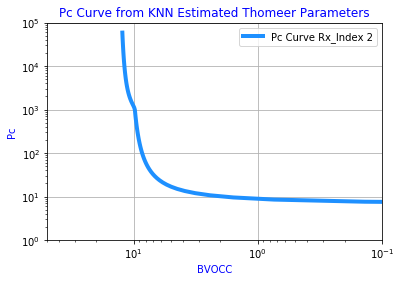


Capillary Pressure Curve for a Rock_Index = 2.0 sample, which is a Macro-Porous Rock with Micro-Porous Grains,  bi-modal



In [10]:
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #              Plot to Figures
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================


# =============================================================================
# Porosity vs. Permeability Cross Plot with Rock Types on Z-axis
# =============================================================================
plt.figure(0)

for i in range(0,sh.nrows,1):
    if Rock_Index[i]   == 1:
        plt.semilogy(Porosity[i], Permeability[i], color='cyan', linestyle='none', marker='o', markerfacecolor='cyan', markersize=6)
    elif Rock_Index[i]  == 2: 
        plt.semilogy(Porosity[i], Permeability[i], color='dodgerblue', linestyle='none', marker='o', markerfacecolor='dodgerblue', markersize=6)  
    elif Rock_Index[i]  == 3:
        plt.semilogy(Porosity[i], Permeability[i], color='blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=6)
    elif Rock_Index[i]  == 4:
        plt.semilogy(Porosity[i], Permeability[i], color='yellow', linestyle='none', marker='o', markerfacecolor='yellow', markersize=7)
    elif Rock_Index[i]  == 5:
        plt.semilogy(Porosity[i], Permeability[i], color='orange', linestyle='none', marker='^', markerfacecolor='orange', markersize=6)
    else:
        plt.semilogy(Porosity[i], Permeability[i], color='brown', linestyle='none', marker='d', markerfacecolor='brown', markersize=6)




plt.semilogy(Por, Perm, 'ro', linewidth=0,  markersize=15 , label='User ')
plt.xlim(0,0.4)
plt.ylim(0.0001, 10000)
plt.title("Core Porosity-Permeability Data", color = 'red')
plt.ylabel('Permeability (mD)', color = 'red')
plt.xlabel('Porosity (f)', color = 'red' )
plt.grid(True)
plt.legend()
#plt.show(block=False)
plt.show()



print()
print(Fore.RED +'Most Frequent Rock_Index with  KNN =',n_neighbors,'using normlalized Poro-Perm data.')    
print(Fore.RED + '     Rock_Index =', most_frequent(List), ', which is a', RxType) 


print()
print()
print(Fore.GREEN +'Estimated Thomeer Parameters from KNN =',n_neighbors,' using normlalized Poro-Perm data.')
print(Fore.GREEN + '     G1 =',G1_est_knn, ',  Pd1 =',PD1_est_knn, ', BV1(%) =',BV1_est_knn) 
print(Fore.GREEN + '     G2 =',G2_est_knn, ',  Pd2 =',PD2_est_knn, ', BV2(%) =',BV2_est_knn) 
print(Style.RESET_ALL) 
#print('back to normal now') 



#print(most_frequent(List)) 
if most_frequent(List)   == 1:
    RxType2 = 'Macro-Porous Rock with Meso-Porous Grains, generally bi-modal'
elif most_frequent(List) == 2: 
   RxType2 = 'Macro-Porous Rock with Micro-Porous Grains,  bi-modal'    
elif most_frequent(List) == 3:
    RxType2 = 'Macro-Porous Rock with Meso and Micro Grains, tri-modal'
elif most_frequent(List) == 4:
    RxType2 = 'Type 1 Meso-Porous Rock, uni-modal'
elif most_frequent(List) == 5:
    RxType2 = 'Type 1 Meso-Porous Rock with Micro-Porous Grains, bi-modal'
else:
    RxType2 = 'Non-Reservoir, Type 2 Micro-Porous Rock'




# =============================================================================
# Capillary Pressure Plot
# =============================================================================
plt.figure(1)
#plt.loglog(x, y  , 'g-', linewidth=1, label='Inv Dist Weighted Pc Curve')

if most_frequent(List)   == 1:
    plt.loglog(x, y, color='cyan', linestyle='solid', linewidth=4, label='Pc Curve Rx_Index 1')
elif most_frequent(List)   == 2: 
    plt.loglog(x, y, color='dodgerblue', linestyle='solid', linewidth=4, label='Pc Curve Rx_Index 2')
elif most_frequent(List)   == 3:
    plt.loglog(x, y, color='blue', linestyle='solid', linewidth=4, label='Pc Curve Rx_Index 3')
elif most_frequent(List)   == 4:
    plt.loglog(x, y, color='yellow', linestyle='solid' , linewidth=5, label='Pc Curve Rx_Index 4')
    plt.loglog(x, y, color='black' , linestyle='dotted', linewidth=2)
elif most_frequent(List)   == 5:
    plt.loglog(x, y, color='orange', linestyle='solid', linewidth=4, label='Pc Curve Rx_Index 5')
else:
    plt.loglog(x, y, color='brown', linestyle='solid', linewidth=4, label='Pc Curve Rx_Index 6')


#plt.loglog(x, y, 'r-' , linewidth=3, label='Pc Curve from KNN')

plt.xlim(50, 0.1)
#plt.gca().invert_xaxis()
plt.ylim(1, 100000)
plt.title("Pc Curve from KNN Estimated Thomeer Parameters", color = 'blue')
plt.ylabel('Pc', color = 'blue')
plt.xlabel('BVOCC', color = 'blue')
plt.grid(True)
plt.legend()
plt.show()



print()
#print(Fore.RED +'Estimated Clerke Arab D Carbonate Rock Type from KNN =',n_neighbors,' using normlalized Poro-Perm data')    
print(Fore.BLUE + 'Capillary Pressure Curve for a Rock_Index =', most_frequent(List), 'sample, which is a', RxType2) 

print(Style.RESET_ALL) 







